# Challenge: Build your own NLP model
### Sentiment analysis of Movie Reviews on IMDB 
___
The [dataset](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) contains 25,000 movie reviews from IMDB.com. The reviews have been labeled with a sentiment score of 0 if the IMDB score is < 5, and a score of 1 if the IMDB score is > 7. No individual movie had more than 30 reviews. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Loren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read and examine the data
df = pd.read_csv('labeledTrainData.tsv', sep='\t')

df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
df.shape

(25000, 3)

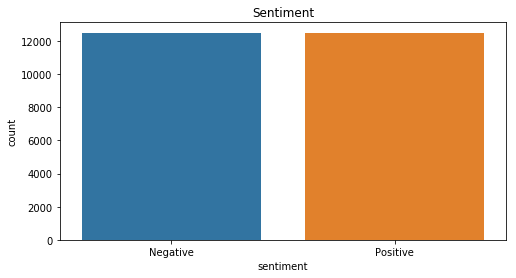

In [4]:
# Examine target variable
plt.figure(figsize=(8,4))
sns.countplot(x="sentiment", data=df);
plt.title('Sentiment')
plt.xticks(np.arange(2),('Negative', 'Positive'))

plt.show()

## Clean data

In [5]:
#Create cleaning function
def text_cleaner(text):
    #make lowercase
    text = text.lower()
    #remove line breaks
    text = re.sub(r'<br \/>','',text)
    #remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    return text
    

In [6]:
df['review'] = df['review'].apply(text_cleaner)

In [7]:
df.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hines...
2,7759_3,0,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


### When I first tried this, I tokenized the words and removed stop words first, but the CountVectorizer function didn't work, what happend here?

In [8]:
#tokenize the reviews
#tokens = df['review'].apply(nltk.tokenize.word_tokenize)

In [9]:
#sw = stopwords.words('English')
#print(sw)

In [10]:
#make function to remove stop words
#def remove_stopwords(text):
#    text = [word for word in text if word not in sw]
#    return text

In [11]:
#remove stop words
#tokens_filtered = tokens.apply(remove_stopwords)

In [12]:
#tokens_filtered.head()

In [13]:
#lemmatizer = WordNetLemmatizer()


In [14]:
#make function to lemmatize
#def make_lemma(text):
 #   lemmatizer = WordNetLemmatizer()
 #   text = [lemmatizer.lemmatize(word) for word in text]
 #   return text

In [16]:
# lemmatize words
#tokens_filtered = tokens_filtered.apply(make_lemma)

In [17]:
# tokens_filtered.head()

## Bag of Words

In [18]:
# Create countvectorizer tool and fit_transform the reviews
cv = CountVectorizer(ngram_range=(1, 2), max_features=5000, analyzer='word', lowercase=True)
test_bag = cv.fit_transform(df['review'])


In [19]:
# Convert to array
bow_features = test_bag.toarray()

In [20]:
vocab = cv.get_feature_names()

## Naive Bayes w/ BOW

In [31]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

Y = df['sentiment']
X = bow_features

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train, Y_train)

naive_bayes.score(X_test, Y_test)

0.8516

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(naive_bayes, X, Y, cv=10)

array([0.842 , 0.8316, 0.848 , 0.836 , 0.8428, 0.8432, 0.8448, 0.8608,
       0.838 , 0.8508])

# TFIDF

In [23]:
#create tf-idf tool
tf_idf_v = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, analyzer='word', lowercase=True)

In [24]:
# fit & transform into features
tf_idf_features = tf_idf_v.fit_transform(df['review'])

In [25]:
# transform into array
tf_idf_features = tf_idf_features.toarray()

In [26]:
# extract vocab
tfidf_vocab = tf_idf_v.vocabulary_.items

## Naive Bayes with TF-IDF

In [29]:
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train, Y_train)

naive_bayes.score(X_test, Y_test)

0.8516

In [30]:
cross_val_score(naive_bayes, X_tf_idf, Y, cv=10)

array([0.842 , 0.8316, 0.848 , 0.836 , 0.8428, 0.8432, 0.8448, 0.8608,
       0.838 , 0.8508])

#### They are exactly the same. This seems strange. I'll try a different model.

In [33]:
from sklearn.linear_model import LogisticRegression

Y = df['sentiment']
X = bow_features

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8514666666666667

In [34]:
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)


X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8801333333333333

In [35]:
cross_val_score(lr, X_tf_idf, Y, cv=10)

array([0.886 , 0.8796, 0.8956, 0.872 , 0.8724, 0.8788, 0.8796, 0.888 ,
       0.8748, 0.8844])

### So tf_idf in the logistic regression model is performing the best. I'll focus on that and try to increase it's accuracy.

In [37]:
#create tf-idf tool, including tri-grams
tf_idf_v = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, analyzer='word', lowercase=True)
tf_idf_features = tf_idf_v.fit_transform(df['review'])
tf_idf_features = tf_idf_features.toarray()
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8828

In [39]:
#create tf-idf tool, including tri-grams, increasing max_features
tf_idf_v = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, analyzer='word', lowercase=True)
tf_idf_features = tf_idf_v.fit_transform(df['review'])
tf_idf_features = tf_idf_features.toarray()
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8868

In [40]:
sw = stopwords.words('English')

#create tf-idf tool, including tri-grams, increasing max_features, adding stopwords
tf_idf_v = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, analyzer='word', lowercase=True, stop_words=sw)
tf_idf_features = tf_idf_v.fit_transform(df['review'])
tf_idf_features = tf_idf_features.toarray()
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.888

In [47]:
#create tf-idf tool, including tri-grams, increasing max_features, adding stopwords
tf_idf_v = TfidfVectorizer(ngram_range=(1, 3), analyzer='word',max_features=15000, lowercase=True, stop_words=sw)
tf_idf_features = tf_idf_v.fit_transform(df['review'])
tf_idf_features = tf_idf_features.toarray()
Y = df['sentiment']
X_tf_idf = tf_idf_features

X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, Y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8928

In [48]:
cross_val_score(lr, X_tf_idf, Y, cv=10)

array([0.8924, 0.8884, 0.9036, 0.89  , 0.8816, 0.8812, 0.8976, 0.8936,
       0.8844, 0.8972])